# Tuan Nguyen, Utica College MSDS, Fall 2021 DSC 680 Capstone

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 
# Data Wrangling & Exploratory Data Analysis

# 
# Machine Learning

In [2]:
cnn_df = pd.DataFrame(np.load('C:/Users/cg/Documents/cnndf.npy', mmap_mode=None, allow_pickle=True))
cnn_df = cnn_df.rename(columns={0: 'modulation_class', 1: 'signal_class', 2: 'snr', 3: 'iq_sig'})

## 
# CNN Preprocessing

In [3]:
from keras import callbacks
from keras import layers
from keras import models
from keras import Input
from keras.models import Model

In [4]:
# Preprocessing - Select Subsample of Data

# cnn_df = cnn_df[cnn_df.snr >= 0]

In [5]:
# Preprocessing - Create Train & Test Sets

import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, sig_train, sig_test, mod_train, mod_test= train_test_split(cnn_df['iq_sig'],
                                                                            cnn_df['signal_class'], 
                                                                            cnn_df['modulation_class'],
                                                                            train_size = .80, 
                                                                            random_state = 2850)

In [6]:
# Preprocessing - Encoding

mod_train = pd.get_dummies(mod_train)
mod_test = pd.get_dummies(mod_test)

sig_train = pd.get_dummies(sig_train)
sig_test = pd.get_dummies(sig_test)

In [7]:
# Preprocessing - Padding

from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, dtype='float32', maxlen=16)
x_test = sequence.pad_sequences(x_test, dtype='float32', maxlen=16)

In [8]:
# Preprocessing - Reshape

N, H, W = x_train.shape
N_test = x_test.shape[0]
C = 1

x_train = x_train.reshape(N, H, W, C)
x_test = x_test.reshape(N_test, H, W, C)

## 
# Single Task CNN - Modulation Classification

In [35]:
# Create Convolutional Neural Network for Modulation Classification

mod_classification_cnn = models.Sequential()

mod_classification_cnn.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = x_train.shape[1:])) 
mod_classification_cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
mod_classification_cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
mod_classification_cnn.add(layers.Flatten())
mod_classification_cnn.add(layers.Dense(64, activation = 'relu'))
mod_classification_cnn.add(layers.Dense(6, activation = 'softmax'))

mod_classification_cnn.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

mod_cnn = mod_classification_cnn.fit(x_train,  mod_train, epochs = 10,  batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 30s 11ms/step - loss: 0.8818 - accuracy: 0.7019 - val_loss: 0.7124 - val_accuracy: 0.7643
Epoch 2/10
2821/2821 [==============================] - 29s 10ms/step - loss: 0.7180 - accuracy: 0.7598 - val_loss: 0.6984 - val_accuracy: 0.7705
Epoch 3/10
2821/2821 [==============================] - 29s 10ms/step - loss: 0.6913 - accuracy: 0.7680 - val_loss: 0.6811 - val_accuracy: 0.7737
Epoch 4/10
2821/2821 [==============================] - 29s 10ms/step - loss: 0.6687 - accuracy: 0.7756 - val_loss: 0.6611 - val_accuracy: 0.7840
Epoch 5/10
2821/2821 [==============================] - 29s 10ms/step - loss: 0.6496 - accuracy: 0.7817 - val_loss: 0.6560 - val_accuracy: 0.7875
Epoch 6/10
2821/2821 [==============================] - 32s 11ms/step - loss: 0.6320 - accuracy: 0.7859 - val_loss: 0.6458 - val_accuracy: 0.7894
Epoch 7/10
2821/2821 [==============================] - 31s 11ms/step - loss: 0.6145 - accuracy: 0.7904 - val_loss: 0.6605 -

In [10]:
# mod_classification_cnn.output_shape # Model Output Shape
# mod_classification_cnn.get_config() # Model Configuration
# mod_classification_cnn.get_weights() # Model Weights
# mod_classification_cnn.predict(x_test, batch_size=32) # Model Prediction
# mod_classification_cnn.predict_classes(x_test, batch_size=32) # Model Class Prediction
mod_classification_cnn.evaluate(x_test, mod_test, batch_size = 32) # Model Evaluation

784/784 [==============================] - 2s 3ms/step - loss: 0.6648 - accuracy: 0.7861


[0.6647999286651611, 0.7861444354057312]

## 
# Single Task CNN - Signal Classification

In [12]:
# Create Convolutional Neural Network for Signal Classification

sig_classification_cnn = models.Sequential()

sig_classification_cnn.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = x_train.shape[1:])) 
sig_classification_cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
sig_classification_cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',  padding = 'same'))
sig_classification_cnn.add(layers.Flatten())
sig_classification_cnn.add(layers.Dense(64, activation = 'relu'))
sig_classification_cnn.add(layers.Dense(8, activation = 'softmax'))

sig_classification_cnn.compile(optimizer = 'nadam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

sig_cnn = sig_classification_cnn.fit(x_train, sig_train, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 30s 11ms/step - loss: 1.1525 - accuracy: 0.5669 - val_loss: 1.0075 - val_accuracy: 0.6144
Epoch 2/10
2821/2821 [==============================] - 30s 11ms/step - loss: 0.9720 - accuracy: 0.6288 - val_loss: 0.9632 - val_accuracy: 0.6308
Epoch 3/10
2821/2821 [==============================] - 30s 11ms/step - loss: 0.9357 - accuracy: 0.6433 - val_loss: 0.9389 - val_accuracy: 0.6425
Epoch 4/10
2821/2821 [==============================] - 30s 11ms/step - loss: 0.9150 - accuracy: 0.6519 - val_loss: 0.9268 - val_accuracy: 0.6497
Epoch 5/10
2821/2821 [==============================] - 30s 10ms/step - loss: 0.8974 - accuracy: 0.6586 - val_loss: 0.9250 - val_accuracy: 0.6454
Epoch 6/10
2821/2821 [==============================] - 30s 11ms/step - loss: 0.8797 - accuracy: 0.6674 - val_loss: 0.9179 - val_accuracy: 0.6493
Epoch 7/10
2821/2821 [==============================] - 30s 10ms/step - loss: 0.8619 - accuracy: 0.6750 - val_loss: 0.9210 -

In [13]:
# sig_classification_cnn.output_shape # Model Output Shape
# sig_classification_cnn.get_config() # Model Configuration
# sig_classification_cnn.get_weights() # Model Weights
# sig_classification_cnn.predict(x_test, batch_size=32) # Model Prediction
# sig_classification_cnn.predict_classes(x_test, batch_size=32) # Model Class Prediction
sig_classification_cnn.evaluate(x_test, sig_test, batch_size = 32) # Model Evaluation

784/784 [==============================] - 2s 3ms/step - loss: 0.9372 - accuracy: 0.6449


[0.9371502995491028, 0.6448769569396973]

# 
# Multi Task CNN - Modulation & Signal Classification

In [14]:
#32-32-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(32, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(32, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl1 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 16s 6ms/step - loss: 1.1181 - mod_class_loss: 0.8790 - sig_class_loss: 1.1779 - mod_class_accuracy: 0.7005 - sig_class_accuracy: 0.5571 - val_loss: 0.9922 - val_mod_class_loss: 0.7476 - val_sig_class_loss: 1.0533 - val_mod_class_accuracy: 0.7509 - val_sig_class_accuracy: 0.6037
Epoch 2/10
2821/2821 [==============================] - 16s 6ms/step - loss: 0.9405 - mod_class_loss: 0.7294 - sig_class_loss: 0.9933 - mod_class_accuracy: 0.7564 - sig_class_accuracy: 0.6205 - val_loss: 0.9255 - val_mod_class_loss: 0.7043 - val_sig_class_loss: 0.9808 - val_mod_class_accuracy: 0.7682 - val_sig_class_accuracy: 0.6287
Epoch 3/10
2821/2821 [==============================] - 16s 6ms/step - loss: 0.9113 - mod_class_loss: 0.7047 - sig_class_loss: 0.9630 - mod_class_accuracy: 0.7643 - sig_class_accuracy: 0.6328 - val_loss: 0.9017 - val_mod_class_loss: 0.6861 - val_sig_class_loss: 0.9555 - val_mod_class_accuracy: 0.7752 - val_sig_class_accuracy: 0.

In [15]:
#32-64-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(64, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(64, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl2 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 33s 12ms/step - loss: 1.0717 - mod_class_loss: 0.8440 - sig_class_loss: 1.1287 - mod_class_accuracy: 0.7145 - sig_class_accuracy: 0.5773 - val_loss: 1.0342 - val_mod_class_loss: 0.7901 - val_sig_class_loss: 1.0953 - val_mod_class_accuracy: 0.7167 - val_sig_class_accuracy: 0.5943
Epoch 2/10
2821/2821 [==============================] - 33s 12ms/step - loss: 0.9219 - mod_class_loss: 0.7077 - sig_class_loss: 0.9754 - mod_class_accuracy: 0.7644 - sig_class_accuracy: 0.6284 - val_loss: 0.9439 - val_mod_class_loss: 0.7100 - val_sig_class_loss: 1.0024 - val_mod_class_accuracy: 0.7632 - val_sig_class_accuracy: 0.6182
Epoch 3/10
2821/2821 [==============================] - 36s 13ms/step - loss: 0.8957 - mod_class_loss: 0.6877 - sig_class_loss: 0.9477 - mod_class_accuracy: 0.7694 - sig_class_accuracy: 0.6380 - val_loss: 1.0897 - val_mod_class_loss: 0.9574 - val_sig_class_loss: 1.1228 - val_mod_class_accuracy: 0.6650 - val_sig_class_accuracy:

In [16]:
#32-128-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(128, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(128, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl3 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 59s 21ms/step - loss: 1.0579 - mod_class_loss: 0.8361 - sig_class_loss: 1.1134 - mod_class_accuracy: 0.7155 - sig_class_accuracy: 0.5804 - val_loss: 0.9626 - val_mod_class_loss: 0.7411 - val_sig_class_loss: 1.0180 - val_mod_class_accuracy: 0.7447 - val_sig_class_accuracy: 0.6156
Epoch 2/10
2821/2821 [==============================] - 62s 22ms/step - loss: 0.9187 - mod_class_loss: 0.7069 - sig_class_loss: 0.9717 - mod_class_accuracy: 0.7642 - sig_class_accuracy: 0.6286 - val_loss: 0.9068 - val_mod_class_loss: 0.6835 - val_sig_class_loss: 0.9627 - val_mod_class_accuracy: 0.7765 - val_sig_class_accuracy: 0.6348
Epoch 3/10
2821/2821 [==============================] - 62s 22ms/step - loss: 0.8917 - mod_class_loss: 0.6813 - sig_class_loss: 0.9444 - mod_class_accuracy: 0.7715 - sig_class_accuracy: 0.6395 - val_loss: 0.8865 - val_mod_class_loss: 0.6674 - val_sig_class_loss: 0.9412 - val_mod_class_accuracy: 0.7842 - val_sig_class_accuracy:

In [17]:
#32-256-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(256, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(256, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl4 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 97s 34ms/step - loss: 1.0413 - mod_class_loss: 0.8201 - sig_class_loss: 1.0966 - mod_class_accuracy: 0.7229 - sig_class_accuracy: 0.5867 - val_loss: 0.9361 - val_mod_class_loss: 0.7178 - val_sig_class_loss: 0.9907 - val_mod_class_accuracy: 0.7618 - val_sig_class_accuracy: 0.6198
Epoch 2/10
2821/2821 [==============================] - 97s 34ms/step - loss: 0.9083 - mod_class_loss: 0.6984 - sig_class_loss: 0.9608 - mod_class_accuracy: 0.7678 - sig_class_accuracy: 0.6344 - val_loss: 0.8879 - val_mod_class_loss: 0.6718 - val_sig_class_loss: 0.9420 - val_mod_class_accuracy: 0.7815 - val_sig_class_accuracy: 0.6425
Epoch 3/10
2821/2821 [==============================] - 96s 34ms/step - loss: 0.8793 - mod_class_loss: 0.6732 - sig_class_loss: 0.9308 - mod_class_accuracy: 0.7754 - sig_class_accuracy: 0.6456 - val_loss: 0.8951 - val_mod_class_loss: 0.6599 - val_sig_class_loss: 0.9539 - val_mod_class_accuracy: 0.7810 - val_sig_class_accuracy:

# 
# Visualizations

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn

from matplotlib.pyplot import figure

### STL Modulation Classification Accuracy

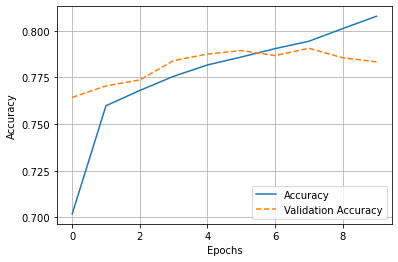

In [45]:
# Plot STL Modulation Classification Accuracy

plt.plot(mod_cnn.history['accuracy'])
plt.plot(mod_cnn.history['val_accuracy'], '--')

#plt.title('STL Modulation Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.7, .825, .025)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='lower right')

plt.show()

### STL Modulation Classification Loss

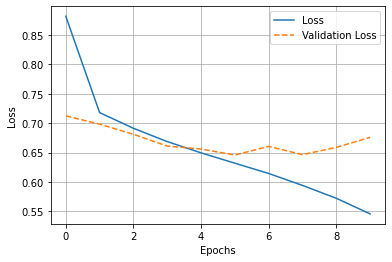

In [40]:
# Plot STL Modulation Classification Loss

plt.plot(mod_cnn.history['loss'])
plt.plot(mod_cnn.history['val_loss'], '--')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.grid()

plt.legend(['Loss', 'Validation Loss'], loc='upper right')

plt.show()

### STL Signal Classification Accuracy

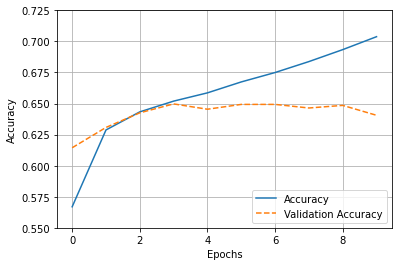

In [36]:
# Plot STL Signal Classification Accuracy

plt.plot(sig_cnn.history['accuracy'])
plt.plot(sig_cnn.history['val_accuracy'], '--')

#plt.title('STL Signal Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.55, .75, .025)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='lower right')

plt.show()

### STL Signal Classification Loss

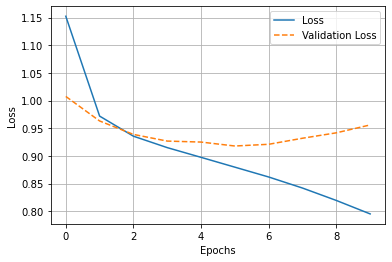

In [39]:
# Plot STL Signal Classification Loss

plt.plot(sig_cnn.history['loss'])
plt.plot(sig_cnn.history['val_loss'], '--')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.grid()

plt.legend(['Loss', 'Validation Loss'], loc='upper right')

plt.show()

### MTL Modulation Classification Accuracy

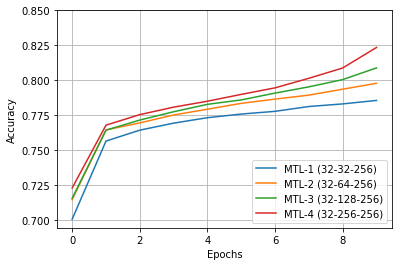

In [41]:
# Plot MTL Modulation Classification Accuracy

plt.plot(mtl1.history['mod_class_accuracy'])
plt.plot(mtl2.history['mod_class_accuracy'])
plt.plot(mtl3.history['mod_class_accuracy'])
plt.plot(mtl4.history['mod_class_accuracy'])

#plt.title('MTL Modulation Classification Accuracy')

plt.legend(['MTL-1 (32-32-256)', 
            'MTL-2 (32-64-256)', 
            'MTL-3 (32-128-256)',
            'MTL-4 (32-256-256)'], loc='lower right')
 

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.70, .85, .025)
plt.yticks(y_ticks)

plt.grid()

plt.show()


### MTL Modulation Classification Loss

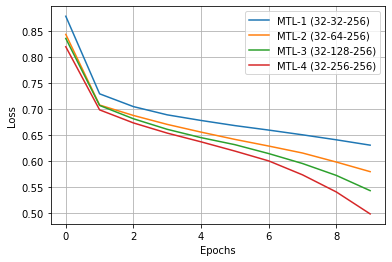

In [38]:
# Plot MTL Signal Classification Loss

plt.plot(mtl1.history['mod_class_loss'])
plt.plot(mtl2.history['mod_class_loss'])
plt.plot(mtl3.history['mod_class_loss'])
plt.plot(mtl4.history['mod_class_loss'])

plt.legend(['MTL-1 (32-32-256)', 
            'MTL-2 (32-64-256)', 
            'MTL-3 (32-128-256)',
            'MTL-4 (32-256-256)'], loc='upper right')
 

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.grid()

plt.show()

### MTL Signal Classification Accuracy

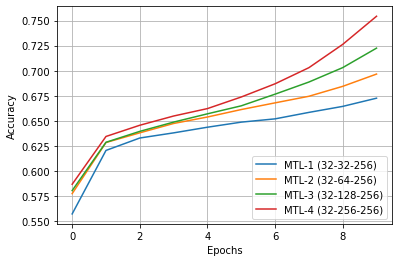

In [25]:
# Plot MTL Signal Classification Accuracy

plt.plot(mtl1.history['sig_class_accuracy'])
plt.plot(mtl2.history['sig_class_accuracy'])
plt.plot(mtl3.history['sig_class_accuracy'])
plt.plot(mtl4.history['sig_class_accuracy'])


#plt.title('MTL Signal Classification Accuracy')

plt.legend(['MTL-1 (32-32-256)', 
            'MTL-2 (32-64-256)', 
            'MTL-3 (32-128-256)',
            'MTL-4 (32-256-256)'], loc='lower right')
 

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.grid()

plt.show()


### MTL Signal Classification Loss

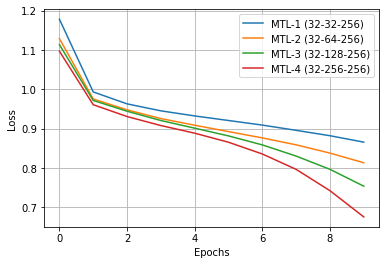

In [37]:
# Plot MTL Signal Classification Loss

plt.plot(mtl1.history['sig_class_loss'])
plt.plot(mtl2.history['sig_class_loss'])
plt.plot(mtl3.history['sig_class_loss'])
plt.plot(mtl4.history['sig_class_loss'])


plt.legend(['MTL-1 (32-32-256)', 
            'MTL-2 (32-64-256)', 
            'MTL-3 (32-128-256)',
            'MTL-4 (32-256-256)'], loc='upper right')
 

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.grid()

plt.show()


### MTL-4 Modulation Classification Accuracy

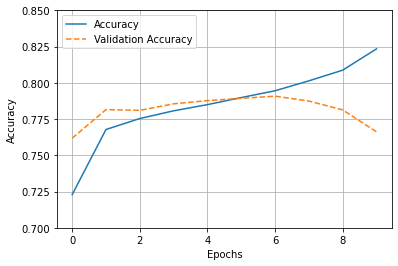

In [42]:
# Plot MTL4 Modulation Classification Accuracy

plt.plot(mtl4.history['mod_class_accuracy'])
plt.plot(mtl4.history['val_mod_class_accuracy'], '--')

#plt.title('MTL Model 4 Modulation Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.70, .85, .025)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.show()

### MTL-4 Modulation Classification Loss

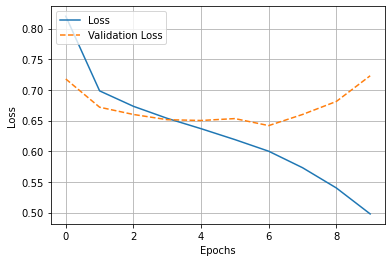

In [43]:
# Plot MTL4 Modulation Classification Loss

plt.plot(mtl4.history['mod_class_loss'])
plt.plot(mtl4.history['val_mod_class_loss'], '--')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.grid()

plt.legend(['Loss', 'Validation Loss'], loc='upper left')

plt.show()

### MTL-4 Signal Classification Accuracy

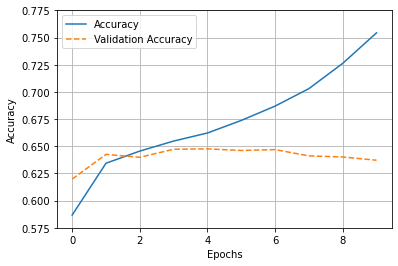

In [44]:
# Plot MTL4 Signal Classification Accuracy

plt.plot(mtl4.history['sig_class_accuracy'])
plt.plot(mtl4.history['val_sig_class_accuracy'], '--')

#plt.title('MTL Model 4 Signal Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.575, .775, .025)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.show()

### MTL-4 Signal Classification Loss

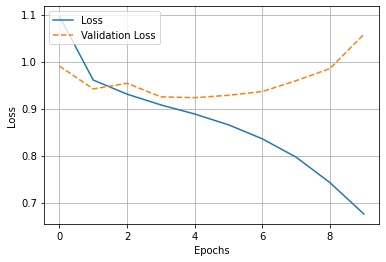

In [30]:
# Plot MTL4 Signal Classification Loss

plt.plot(mtl4.history['sig_class_loss'])
plt.plot(mtl4.history['val_sig_class_loss'], '--')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.grid()

plt.legend(['Loss', 'Validation Loss'], loc='upper left')

plt.show()

### MTL-4 SNR Ranges

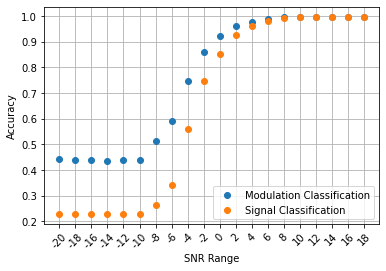

In [31]:
# Plot MTL Model 4 Accuracy Across Various SNR Ranges

mtl_snr = pd.DataFrame(pd.read_csv('C:/Users/cg/Desktop/mtl_snr4.csv'))

plt.plot(mtl_snr['mod_class_accuracy'], 'o')
plt.plot(mtl_snr['sig_class_accuracy'], 'o')

#plt.title('MTL Classification Accuracy Across Various SNR Ranges')

plt.ylabel('Accuracy')
plt.xlabel('SNR Range')

plt.grid()

plt.xticks(range(len(mtl_snr)), mtl_snr['snr'])
plt.xticks(rotation=45)

#y_ticks = np.arange(0, 1, .1)
#plt.yticks(y_ticks)

plt.legend(['Modulation Classification',
            'Signal Classification'], loc='lower right')

plt.show()